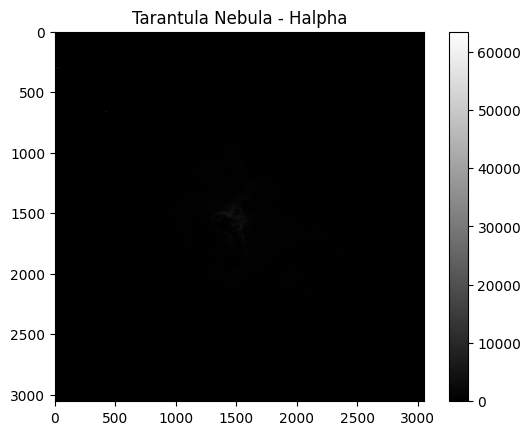

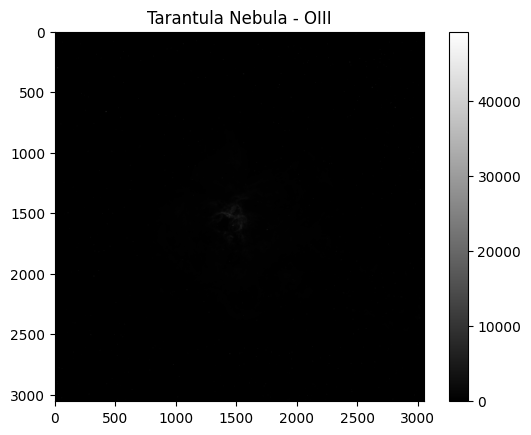

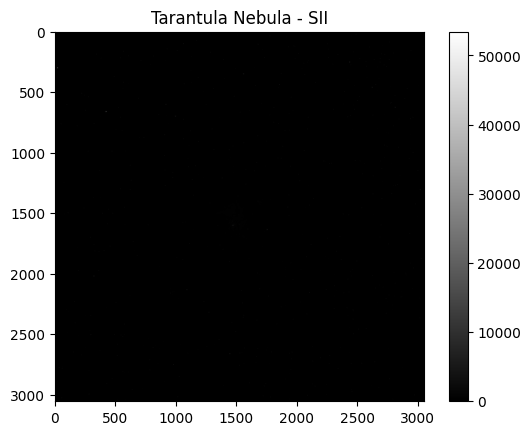

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

data = fits.getdata('images/Tarantula_Nebula-halpha.fit')
data2 = fits.getdata('images/Tarantula_Nebula-oiii.fit')
data3 = fits.getdata('images/Tarantula_Nebula-sii.fit')


plt.figure()  
image1 = plt.imshow(data, cmap='gray')
plt.colorbar(image1)
plt.title("Tarantula Nebula - Halpha")
plt.show()


plt.figure()  
image2 = plt.imshow(data2, cmap='gray')
plt.colorbar(image2)
plt.title("Tarantula Nebula - OIII")
plt.show()


plt.figure()  
image3 = plt.imshow(data3, cmap='gray')
plt.colorbar(image3)
plt.title("Tarantula Nebula - SII")
plt.show()


In [2]:
from astroquery.mast import Observations
import numpy as np

# Downloading astrony observations images from MAST with selecting what we want (ex: M51, M31, etc..)
class spaceDownload:
    def __init__(self, download_dir="images"):
        self.download_dir = download_dir

    def search_observations(self, object_name, filters=None):
        print(f"Searching observations for {object_name}...")
        results = Observations.query_object(object_name, radius="0.1 deg")
        if filters:
            results = results[np.isin(results['filters'], filters)]
        print(f"Found {len(results)} results.")
        return results

    def download_observation(self, obs_id):
        print(f"Downloading observation {obs_id}...")
        manifest = Observations.download_products(
            Observations.get_product_list(obs_id),
            download_dir=self.download_dir
        )
        print("Download complete.")
        return manifest

    def stop_download(self):
        self.stop_requested = True
        print("Stop downloading.")

if __name__ == "__main__":
    tool = spaceDownload()

    while True:
        object_name = input("Enter the name of the celestial object to search (or 'STOP' to cancel): ")
        if object_name.upper() == "STOP":
            print("Program stopped.")
            break
        
        results = tool.search_observations(object_name)
        if len(results) > 0:
            for i, result in enumerate(results):
                print(f"[{i}] Obs ID: {result['obsid']}, Target: {result['target_name']}")

            choice = input("Enter the index of the observation to download: ([0][1]etc..)")
            if choice.isdigit() and int(choice) < len(results):
                obs_id = results[int(choice)]['obsid']
                tool.download_observation(obs_id)
            else:
                print("Invalid choice. Please enter a valid index.")
        else:
            print(f"No observations found for {object_name}.")


Searching observations for ...


HTTPError: 500 Server Error: Internal Server Error for url: https://mast.stsci.edu/api/v0/invoke?request=%7B%22service%22%3A%20%22Mast.Name.Lookup%22%2C%20%22params%22%3A%20%7B%22input%22%3A%20%22%22%2C%20%22format%22%3A%20%22json%22%7D%7D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


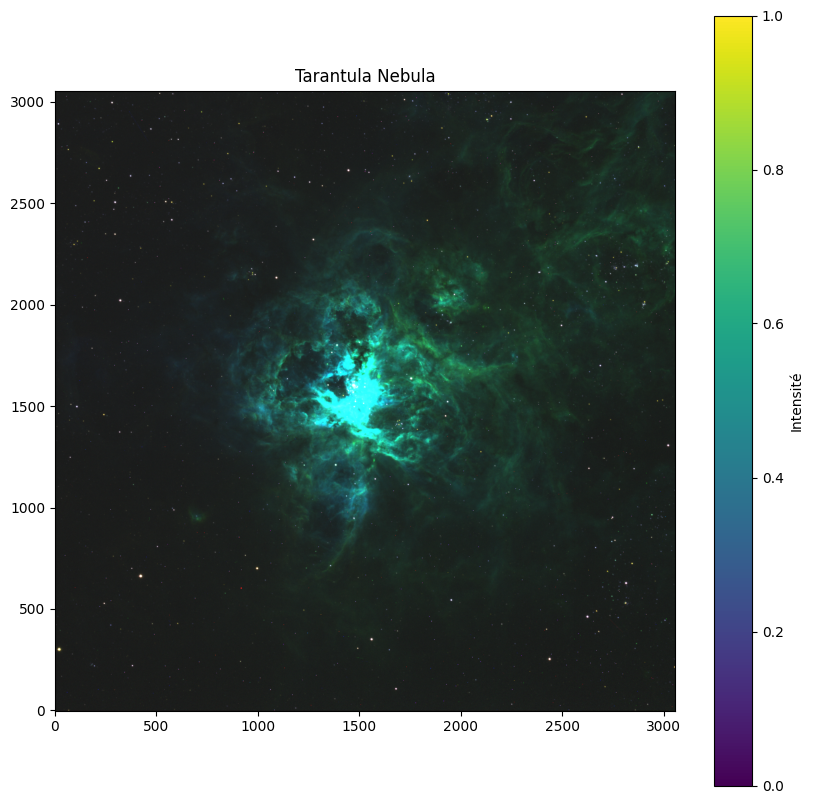

In [41]:
from astropy.io import fits
from astropy.visualization import (MinMaxInterval, ImageNormalize)
import matplotlib.pyplot as plt
import numpy as np

data = fits.getdata('images/Tarantula_Nebula-halpha.fit')
data2 = fits.getdata('images/Tarantula_Nebula-oiii.fit')
data3 = fits.getdata('images/Tarantula_Nebula-sii.fit')

# Fixer les plages de valeurs pour augmenter le contraste (modifier selon les besoins)
vmin, vmax = 10, 1000

norm = ImageNormalize(data, vmin=vmin, vmax=vmax, interval=MinMaxInterval())
norm2 = ImageNormalize(data2, vmin=vmin, vmax=vmax, interval=MinMaxInterval())
norm3 = ImageNormalize(data3, vmin=vmin, vmax=vmax, interval=MinMaxInterval())

rgb_image = np.dstack((norm3(data3), norm(data), norm2(data2)))

plt.figure(figsize=(10, 10))
plt.imshow(rgb_image, origin='lower')
plt.title("Tarantula Nebula")
plt.colorbar(label="Intensité")
plt.show()


In [40]:
from astropy.io import fits

# Chargement du fichier FITS
filename = 'images/mastDownload/TESS/tess2019255032927-s0016-4-3-0152-s/tess2019255032927-s0016-4-3-0152-s_ffic.fits'
try:
    hdul = fits.open(filename)
    hdul.info()  # Affiche des informations sur le fichier FITS
except Exception as e:
    print(f"Erreur lors de l'ouverture du fichier FITS : {e}")


Erreur lors de l'ouverture du fichier FITS : Empty or corrupt FITS file
